### Command for bulding the localy cloned package

install the package in editable mode (command needs to be copied to the terminal - doens't work in notebook becuase paths or something ¯\_(ツ)_/¯)

""" pip install -e . """

In [ ]:
import sys
print(sys.path)

In [ ]:
sys.path.append("path/to/normalizing-flows-fork")

### Example

In [ ]:
import torch
from normalizing_flows.flows import Flow, PrincipalManifoldFlow
from normalizing_flows.bijections import RealNVP
# from torch.autograd.functional import vjp

In [ ]:
# Create some synthetic training and validation data
torch.manual_seed(0)

event_shape = (10,)
n_train = 100
n_val = 20
n_test = 10000

x_train = torch.randn(n_train, *event_shape) * 2 + 4
x_val = torch.randn(n_val, *event_shape) * 2 + 4
x_test = torch.randn(n_test, *event_shape) * 2 + 4

x_one_dimensional = torch.randn(event_shape) * 2 + 4

In [ ]:
# Train without validation data
torch.manual_seed(0)
flow0 = PrincipalManifoldFlow(RealNVP(event_shape, n_layers=5), debug=False)
flow0.fit(x_train, show_progress=True)

In [ ]:
# Train with validation data and keep the best weights
torch.manual_seed(0)
flow1 = PrincipalManifoldFlow(RealNVP(event_shape, n_layers=5))
flow1.fit(x_train, show_progress=True, x_val=x_val)

In [ ]:
# Train with validation data, early stopping, and keep the best weights
torch.manual_seed(0)
flow2 = PrincipalManifoldFlow(RealNVP(event_shape, n_layers=5))
flow2.fit(x_train, show_progress=True, x_val=x_val, early_stopping=True)

In [ ]:
print("Test loss values")
print()
print(f"Without validation data: {torch.mean(-flow0.log_prob(x_test))}")
print(f"With validation data, no early stopping: {torch.mean(-flow1.log_prob(x_test))}")
print(f"With validation data, early stopping: {torch.mean(-flow2.log_prob(x_test))}")

### SHAPES EXPERIMENT

In [1]:
import torch
from normalizing_flows.flows import Flow, PrincipalManifoldFlow
from normalizing_flows.bijections import RealNVP

In [2]:
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.insert(0, '../')

from test.shapes import *

sys.path.remove('../')

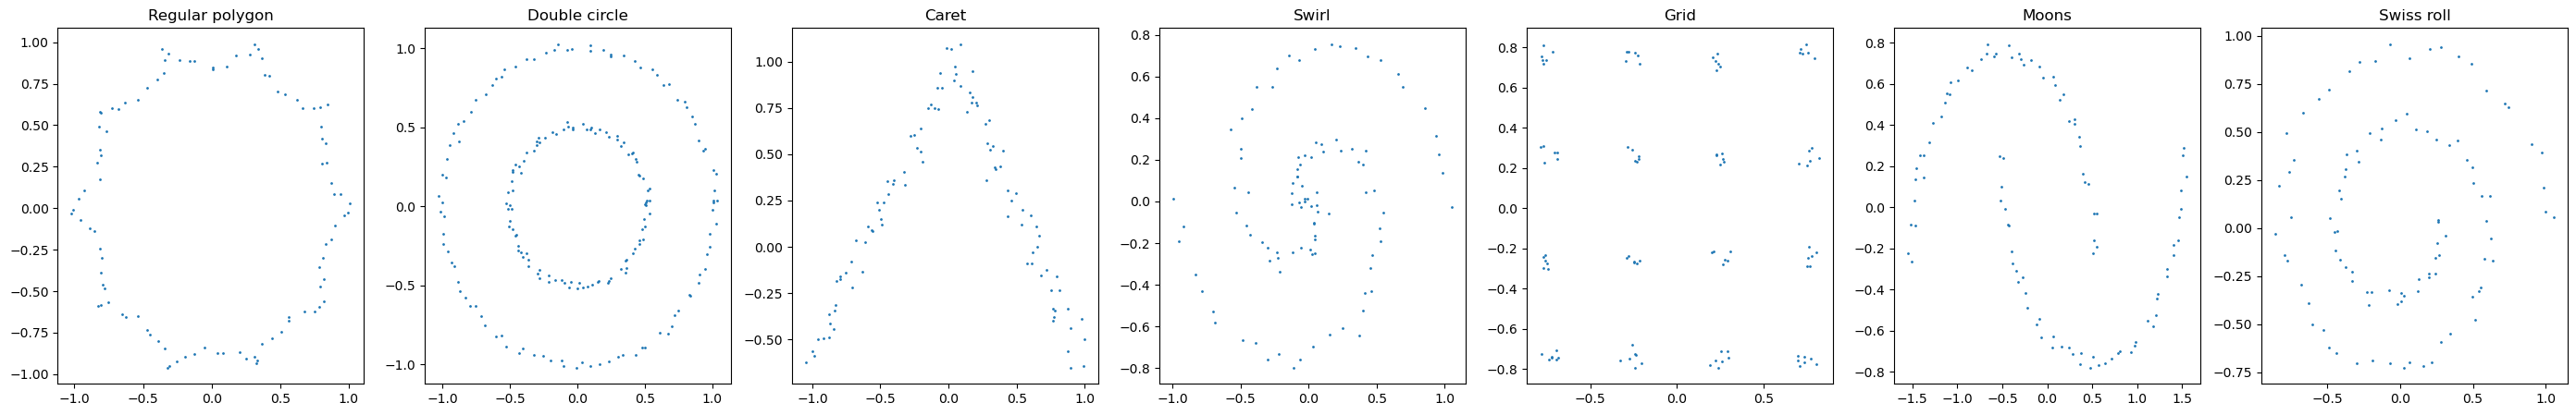

In [3]:
num_points = 100

data_regular_polygon = n_regular_polygon(n=10, radius=1, angle=0, arc_height=0.1, num_points=num_points, noise_std=0.02, seed=0)
data_double_circle = double_circle(num_points=num_points, radius1=1.0, radius2=0.5, noise_std=0.02, seed=0)
data_caret = caret(line_length=2, angle=45, num_points=num_points, noise_std=0.05, seed=0)
data_swirl = swirl(radius=1, angle=0, num_points=num_points, noise_std=0.03, seed=0)
data_grid = grid(n=4, dist=(0.5, 0.5), num_points=num_points, noise_std=0.03, seed=0)
data_moons = moons(radius=1, angle=0, shift=None, num_points=num_points, noise_std=0.03, seed=0)
data_swiss_roll = swiss_roll(radius1=1, radius2=0.25, num_revolutions=2, num_points=num_points, noise_std=0.03, seed=0)


# Plotting the generated points
ax, fig = plt.subplots(1, 7, figsize=(35, 5))
fig[0].scatter(data_regular_polygon[0], data_regular_polygon[1], s=1)
fig[0].set_title("Regular polygon")
fig[1].scatter(data_double_circle[0], data_double_circle[1], s=1)
fig[1].set_title("Double circle")
fig[2].scatter(data_caret[0], data_caret[1], s=1)
fig[2].set_title("Caret")
fig[3].scatter(data_swirl[0], data_swirl[1], s=1)
fig[3].set_title("Swirl")
fig[4].scatter(data_grid[0], data_grid[1], s=1)
fig[4].set_title("Grid")
fig[5].scatter(data_moons[0], data_moons[1], s=1)
fig[5].set_title("Moons")
fig[6].scatter(data_swiss_roll[0], data_swiss_roll[1], s=1)
fig[6].set_title("Swiss roll")
plt.show()

In [4]:
# prepare the data
data_tensor = torch.tensor(np.stack(data_swirl, axis=1)).float()  # Create a tensor from the data
n_dim = 2

In [ ]:
torch.manual_seed(0)
normal_flow = Flow(RealNVP(n_dim, n_layers=10), record_Ihat_P=True, record_log_px=True)
normal_flow.fit(data_tensor, show_progress=True)

In [5]:
torch.manual_seed(0)
PM_flow = PrincipalManifoldFlow(RealNVP(n_dim, n_layers=10), record_Ihat_P=True, record_log_px=True, debug=False, method="vectorized")
PM_flow.fit(data_tensor, show_progress=True)

Fitting Principal Manifold Flow:   0%|          | 0/500 [00:00<?, ?it/s]


RuntimeError: You are attempting to call Tensor.requires_grad_() (or perhaps using torch.autograd.functional.* APIs) inside of a function being transformed by a functorch transform. This is unsupported, please attempt to use the functorch transforms (e.g. grad, vjp, jacrev, jacfwd, hessian) or call requires_grad_() outside of a function being transformed instead.

Comparison of log_px and Ihat_P values of both flows.

In [ ]:
NF_log_px = normal_flow.get_log_px()
NF_Ihat_P = normal_flow.get_Ihat_P()

# print all
print("NF_log_px: ", len(NF_log_px))
print("NF log_px average: ", torch.mean(NF_log_px))
print("NF_Ihat_P: ", len(NF_Ihat_P))
print("NF Ihat_P average: ", torch.mean(NF_Ihat_P))


In [ ]:
PMF_log_px = PM_flow.get_log_px()
PMF_Ihat_P = PM_flow.get_Ihat_P()

# print all
print("PMF_log_px: ", len(PMF_log_px))
print("PMF log_px average: ", torch.mean(PMF_log_px))
print("PMF_Ihat_P: ", len(PMF_Ihat_P))
print("PMF Ihat_P average: ", torch.mean(PMF_Ihat_P))

In [ ]:
print("PMF last 10 Ihat_P: ", PMF_Ihat_P[-10:])
print("NF last 10 Ihat_P: ", NF_Ihat_P[-10:])

In [ ]:
# plot Ihat_P for both flows on same plot (as different lines)
plt.plot(NF_Ihat_P, label="NF")
plt.plot(PMF_Ihat_P, label="PMF")
plt.legend()
plt.title("Ihat_P")
plt.show()

Comparison of new datapoint generation of both flows.

In [ ]:
x_new_normal = normal_flow.sample(1000).detach().numpy()  # Sample 1000 new data points
x_new_PM = PM_flow.sample(1000).detach().numpy()  # Sample 1000 new data points

# plot new data of both flows (using subplots)
ax, fig = plt.subplots(1, 2, figsize=(10, 5))
fig[0].scatter(x_new_normal[:, 0], x_new_normal[:, 1], s=1)
fig[0].set_title("Normal flow")
fig[1].scatter(x_new_PM[:, 0], x_new_PM[:, 1], s=1)
fig[1].set_title("PF flow")

Comparison of the contours created by both flows.

In [ ]:
x_min, x_max = -1, 1
y_min, y_max = -1, 1
x_tick, y_tick = 20, 20
grid_points = generate_grid_data([x_min, x_max], [y_min, y_max], x_tick, y_tick)

# transform grid points
transformed_grid_points_normal = normal_flow.bijection(grid_points)[0].detach().numpy()
transformed_grid_points_PM = PM_flow.bijection(grid_points)[0].detach().numpy()

# plot grid_points as grid with vertical lines being black and horizontal lines being red
ax, fig = plt.subplots(1, 3, figsize=(15, 5))
for i in range(x_tick):
    fig[0].axvline(x=grid_points[i*y_tick,0], color='black')
    fig[1].plot(transformed_grid_points_normal[i*y_tick:i*y_tick+y_tick,0], transformed_grid_points_normal[i*y_tick:i*y_tick+y_tick,1], color='black')
    fig[2].plot(transformed_grid_points_PM[i*y_tick:i*y_tick+y_tick,0], transformed_grid_points_PM[i*y_tick:i*y_tick+y_tick,1], color='black')
for i in range(y_tick):
    fig[0].axhline(y=grid_points[i,1], color='red')
    fig[1].plot(transformed_grid_points_normal[i::y_tick,0], transformed_grid_points_normal[i::y_tick,1], color='red')
    fig[2].plot(transformed_grid_points_PM[i::y_tick,0], transformed_grid_points_PM[i::y_tick,1], color='red')

# add titles
fig[0].set_title("Grid in latent space")
fig[1].set_title("Normal flow")
fig[2].set_title("PF flow")

plt.show()


### Example case for understanding dimensions

In [7]:
import torch

def dummy(x):
    return x**2

In [8]:
x = torch.randn((10, 4))
print(x)

z = dummy(x)
print(z)

tensor([[-0.8974, -0.6870, -1.0655,  0.4026],
        [-0.4052, -0.5834, -0.2585, -0.6056],
        [ 1.6095, -0.7387,  0.6800, -0.7692],
        [-0.0729, -1.4433, -1.2623,  0.5882],
        [-0.3182,  1.8511, -1.2152, -0.1696],
        [ 0.5823,  1.8897,  0.2707,  0.7301],
        [ 0.3737, -1.0004, -0.0039,  1.1844],
        [ 0.7557,  1.2843,  0.5346,  0.3403],
        [ 1.2383,  0.1985,  0.0120,  0.2976],
        [ 0.8700, -0.2510, -2.0019, -2.9021]])
tensor([[8.0529e-01, 4.7202e-01, 1.1352e+00, 1.6207e-01],
        [1.6422e-01, 3.4032e-01, 6.6834e-02, 3.6670e-01],
        [2.5907e+00, 5.4563e-01, 4.6241e-01, 5.9170e-01],
        [5.3120e-03, 2.0832e+00, 1.5933e+00, 3.4596e-01],
        [1.0127e-01, 3.4264e+00, 1.4768e+00, 2.8774e-02],
        [3.3905e-01, 3.5710e+00, 7.3305e-02, 5.3311e-01],
        [1.3962e-01, 1.0009e+00, 1.5023e-05, 1.4029e+00],
        [5.7106e-01, 1.6494e+00, 2.8576e-01, 1.1578e-01],
        [1.5334e+00, 3.9411e-02, 1.4437e-04, 8.8560e-02],
        [7.5685e-

In [9]:

z_dim = z.shape[-1]
batch_size = z.shape[0]

print("dimensions", z_dim)
print("batch_size", batch_size)

k = torch.randint(0, z_dim, (batch_size,))
k_onehot = torch.eye(z_dim, dtype=torch.int32)[k]
print(k)
print(k_onehot)

# G = torch.autograd.functional.jacobian(dummy, x)
GkGkT = torch.empty((batch_size,))
test1GkGkT = torch.empty((batch_size,))
test2GkGkT = torch.empty((batch_size,))


for i in range(len(x)):
    # brute force
    jacobi = torch.autograd.functional.jacobian(dummy, x[i])
    Gk_i = torch.matmul(jacobi, k_onehot[i].float())
    GkGkT[i] = torch.sum(Gk_i**2)

    # First einsum optimisation
    testGk_i = torch.einsum('ij,i->j', jacobi, k_onehot[i].float())
    test1GkGkT[i] = torch.sum(testGk_i**2)

    # Second einsum optimisation
    test2GkGkT[i] = torch.einsum('ij,i,jk->', jacobi, k_onehot[i].float(), jacobi)
    # print(Gk_i)


# Third einsum optimisation
# Compute jacobians for all inputs in x
jacobi_all = torch.stack([torch.autograd.functional.jacobian(dummy, xi) for xi in x])

print("jacobi_all", jacobi_all.shape)

# Expand dimensions of k_onehot to match jacobi_all
k_onehot_expanded = k_onehot.unsqueeze(-1).float()

print("k_onehot_expanded", k_onehot_expanded.shape)

# Perform einsum operation across all inputs in x simultaneously
test3GkGkT = torch.einsum('bij,bie,bjk->b', jacobi_all, k_onehot_expanded, jacobi_all)

print(GkGkT)
print(test1GkGkT)
print(test2GkGkT)
print(test3GkGkT)
print(torch.equal(GkGkT, test1GkGkT))
print(torch.equal(GkGkT, test2GkGkT))
print(torch.equal(GkGkT, test3GkGkT))

dimensions 4
batch_size 10
tensor([0, 3, 1, 0, 0, 2, 1, 3, 0, 1])
tensor([[1, 0, 0, 0],
        [0, 0, 0, 1],
        [0, 1, 0, 0],
        [1, 0, 0, 0],
        [1, 0, 0, 0],
        [0, 0, 1, 0],
        [0, 1, 0, 0],
        [0, 0, 0, 1],
        [1, 0, 0, 0],
        [0, 1, 0, 0]], dtype=torch.int32)
jacobi_all torch.Size([10, 4, 4])
k_onehot_expanded torch.Size([10, 4, 1])
tensor([3.2211, 1.4668, 2.1825, 0.0212, 0.4051, 0.2932, 4.0035, 0.4631, 6.1336,
        0.2520])
tensor([3.2211, 1.4668, 2.1825, 0.0212, 0.4051, 0.2932, 4.0035, 0.4631, 6.1336,
        0.2520])
tensor([3.2211, 1.4668, 2.1825, 0.0212, 0.4051, 0.2932, 4.0035, 0.4631, 6.1336,
        0.2520])
tensor([3.2211, 1.4668, 2.1825, 0.0212, 0.4051, 0.2932, 4.0035, 0.4631, 6.1336,
        0.2520])
True
True
True
